## Import the relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Load the data

In [24]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [30]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Variables

In [34]:
y = data['Admitted']
x1 = data['SAT']

## Let`s plot the data

### Scatter plot

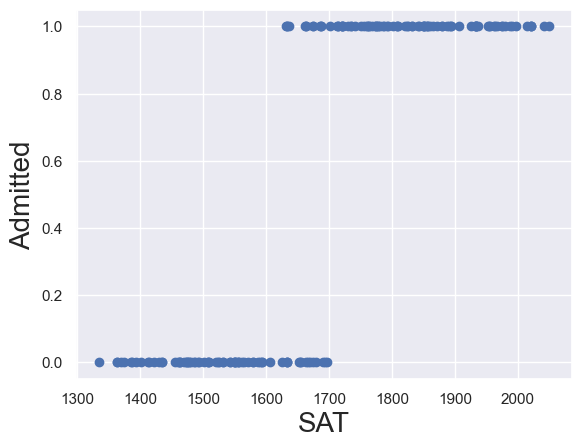

In [42]:
plt.scatter(x1,y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

### Plot with a regression line

/var/folders/4z/mczsf4vs4wsgt6fj97fl9lxw0000gn/T/ipykernel_43897/1137801694.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x1*results_lin.params[1]+results_lin.params[0]


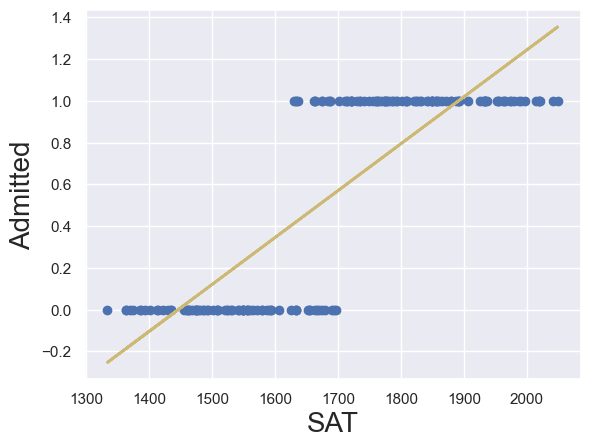

In [47]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y,color='C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat, lw=2, color='C8')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

[Assuming x1 and y are defined earlier in your code]
- x1 = ...
- y = ...

[Adding a constant term to the predictor]
- x = sm.add_constant(x1)

[Fitting the linear regression model]
- reg_lin = sm.OLS(y, x)
- results_lin = reg_lin.fit()

[Scatter plot of the data points]
- plt.scatter(x1, y, color='C0')

[Calculate the predicted values using .iloc to access parameters by position]
- y_hat = x1 * results_lin.params.iloc[1] + results_lin.params.iloc[0]

[Plot the regression line]
- plt.plot(x1, y_hat, lw=2, color='C8')

[Labeling the plot]
- plt.xlabel('SAT', fontsize=20)
- plt.ylabel('Admitted', fontsize=20)

[Display the plot]
- plt.show()

In [55]:
#This regression doesn`t even know that our values are bounded btw 0 and 1
#Linear regression is a great techniques but is simply not fit for this kind of analysis
#B/C our data is non-lnear

### Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


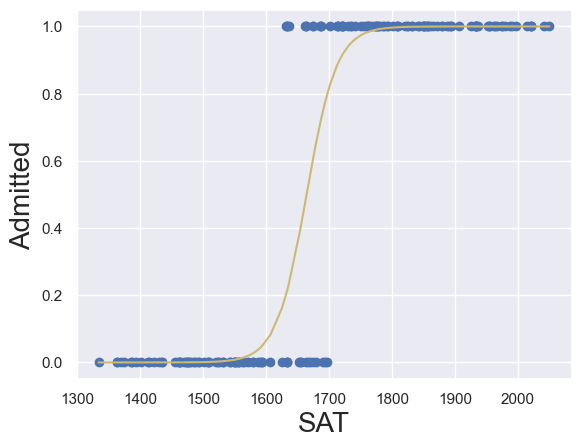

In [58]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params.iloc[0], results_log.params.iloc[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted, f_sorted, color='C8')
plt.show()

In [ ]:
#This function shows the probability of admission, given an SAT score(btw 0 and 1)
#If the score is below the mid-1500s, it is considered 0
#If it is above the mid-1700s, it is considered 1
#For scores in between, the acceptance probability varies based on the score
#logistic regression curve, binary prediction